# Praca Domowa 5
Grunas Jakub, Siński Bartosz, Maciej Pawlikowski


Cancers are diseases involving abnormal cell growth, most of them are deadly and in accordance to the American Cancer Society, the number one killer among them is lung cancer. Our work focuses on determining whether or not a patient is afflicted based on their X-Ray scan and further we examine based on the patient's diagnosis and other information about their physical health before surgery to determine if a patient will survive more than a year after treatment.


## Tabular data model

## Data Description
Thoracic Surgery Data Set dedicated to the post-operative life expectancy in lung cancer patients from https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data# . The data within was gathered at Wroclaw Thoracic Surgery Centre in the years 2007-2011. It contains information such as tumor type, forced vital capacity, performance status, pain before surgery, cough before surgery, smoking, and more. But all of them were categorical information, hence our preprocessing mostly involved one hot encoding them, the other part of preparing data for modeling was multiplying observations in which patients survived because of class size inequality 400 deceased/70 survived.

In [1]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('preprocessed.csv', index_col=0)
df.head()

,DGN2,DGN3,DGN4,DGN5,DGN6,DGN8,PRZ1,PRZ2,OC12,OC13,...,PRE9,PRE10,PRE11,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,1,0,0,0,1,0,60.0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,51.0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,59.0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,54.0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,1,0,0,0,1,0,73.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 469
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DGN2     470 non-null    float64
 1   DGN3     470 non-null    float64
 2   DGN4     470 non-null    float64
 3   DGN5     470 non-null    float64
 4   DGN6     470 non-null    float64
 5   DGN8     470 non-null    float64
 6   PRZ1     470 non-null    float64
 7   PRZ2     470 non-null    float64
 8   OC12     470 non-null    float64
 9   OC13     470 non-null    float64
 10  OC14     470 non-null    float64
 11  PRE4     470 non-null    float64
 12  PRE5     470 non-null    float64
 13  PRE7     470 non-null    int64  
 14  PRE8     470 non-null    int64  
 15  PRE9     470 non-null    int64  
 16  PRE10    470 non-null    int64  
 17  PRE11    470 non-null    int64  
 18  PRE17    470 non-null    int64  
 19  PRE19    470 non-null    int64  
 20  PRE25    470 non-null    int64  
 21  PRE30    470 non

In [5]:
df['Risk1Yr'].value_counts()

0    400
1     70
Name: Risk1Yr, dtype: int64

In [6]:
df = pd.concat([df, df.loc[df['Risk1Yr'] == 1]])

In [7]:
df['Risk1Yr'].value_counts()

0    400
1    140
Name: Risk1Yr, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Risk1Yr'], axis=1), df['Risk1Yr'], stratify=df['Risk1Yr'], test_size=0.3, random_state=39)

# Basic models

In [9]:
def fit_model(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    roc = roc_auc_score(y_test, pred)
    print(pred)
    print("accuracy score: ", acc, "roc auc score: ", roc)

## Logistic regression

In [10]:
lr = LogisticRegression(max_iter=1000)
fit_model(lr)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 1]
accuracy score:  0.7098765432098766 roc auc score:  0.5565476190476191


## Random forest

In [11]:
rfc = RandomForestClassifier(random_state=39)
fit_model(rfc)

[0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1
 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
accuracy score:  0.8950617283950617 roc auc score:  0.8517857142857143


## SVM

In [12]:
svm = SVC()
fit_model(svm)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
accuracy score:  0.7407407407407407 roc auc score:  0.5


## XGB

In [13]:
xgb=XGBClassifier()
fit_model(xgb)

[16:05:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1
 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
accuracy score:  0.8518518518518519 roc auc score:  0.8226190476190475


# Hyperparameter tuning

## Logistic regression

In [14]:
param_grid_lr = [{
    "solver" : ['newton-cg', 'lbfgs', 'liblinear'],
    "penalty" : ['l2', 'l1', 'none'],
    "C" : [10, 1.0, 0.1]
}]

grid_search_lr = GridSearchCV(lr, param_grid_lr, scoring= "accuracy", n_jobs = -1)
grid_search_lr.fit(X_train, y_train)
print(grid_search_lr.best_params_)
print(grid_search_lr.best_score_)

{'C': 10, 'penalty': 'none', 'solver': 'lbfgs'}
0.7432982456140351


## Random forest

In [15]:
param_grid_rfc = [{
    "n_estimators" : [500,  100, 50, 10],
    "max_depth" : [15, 7, 5, 2],
    "random_state" : [39]
}]

grid_search_rfc = GridSearchCV(rfc, param_grid_rfc, scoring= "accuracy", n_jobs = -1)
grid_search_rfc.fit(X_train, y_train)
print(grid_search_rfc.best_params_)
print(grid_search_rfc.best_score_)

{'max_depth': 15, 'n_estimators': 500, 'random_state': 39}
0.8597894736842104


## SVM

In [16]:
param_grid_svm = [{
    "kernel": ["rbf", "linear"],
    "gamma": [1e-3, 1e-4],
    "C": [1, 10, 100, 1000]
}]

grid_search_svm = GridSearchCV(svm, param_grid_svm, scoring= "accuracy", n_jobs = -1)
grid_search_svm.fit(X_train, y_train)
print(grid_search_svm.best_params_)
print(grid_search_svm.best_score_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.7671929824561403


## XGB

In [17]:
param_grid_xgb = [{
    "n_estimators" : [10, 100, 1000],
    "learning_rate" : [0.01, 0.1],
    "colsample_bytree" : [0.5, 0.7, 1.0]
}]

grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, scoring= "accuracy", n_jobs = -1)
grid_search_xgb.fit(X_train, y_train)
print(grid_search_xgb.best_params_)
print(grid_search_xgb.best_score_)

[16:05:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'n_estimators': 1000}
0.8465964912280702


In [18]:
lr_tuned = LogisticRegression(C=10, penalty='none', solver='lbfgs', max_iter=1000)
rfc_tuned = RandomForestClassifier(max_depth=15, n_estimators=500, random_state=39)
svm_tuned = SVC(C=1000, gamma=0.001, kernel='rbf')
xgb_tuned = XGBClassifier(colsample_bytree=1.0, learning_rate=0.1, n_estimators=1000)

for model in [lr_tuned, rfc_tuned, svm_tuned, xgb_tuned]:
    print(model, 'scores:')
    fit_model(model)

LogisticRegression(C=10, max_iter=1000, penalty='none') scores:
[1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 1]
accuracy score:  0.6975308641975309 roc auc score:  0.5636904761904762
RandomForestClassifier(max_depth=15, n_estimators=500, random_state=39) scores:
[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
accuracy score:  0.8703703703703703 roc auc score:  0.7964285714285714
SVC(C=1000, gamma=0.001) scores:
[1 0 0 0 0 0 0 0 0 0 

## Voting Classifier

Apart from standard model, we decided to train a voting classifier, picking three best performinging models (linear regression, random forest, xbg without hyperparameter tuning) as estimators.

In [19]:
estimators = [('RandomForestTuned', rfc_tuned), ('RandomForest', rfc), ('XGB', xgb)]
vc = VotingClassifier(estimators=estimators, voting='hard')
fit_model(vc)

[16:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
accuracy score:  0.8827160493827161 roc auc score:  0.8279761904761905


## Summary
Untuned random forest remains the best model for our dataset with:

 - 89.50% accuracy score  
 - 85.18% roc auc score
 
on the test set.

Text(33.0, 0.5, 'Truth')

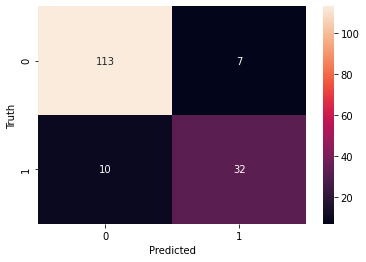

In [21]:

from sklearn.metrics import confusion_matrix, classification_report

matrix = confusion_matrix(y_test, rfc.predict(X_test))
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


## Image Data Model
Original code to which we applied little changes can by found under link  [https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html).
We have used 18-layer ResNet model that was pretrained on ImageNet.

## Data description
The X-Ray dataset was manually gathered from Vin_Dr_Cxt and JSRT data sets. Selection of pictures for modeling mainly concerned filtering out pictures where we found objects such as jewelry and text written on images. In doing so we avoided the situation where the model would determine that someone was sick just because the patient was connected to a medical aperture, or wore a certain type of necklace. The final dataset contained 267 images(121 healthy/146 sick) differing in size, proportion, and brightness.

In [46]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
torch.manual_seed(52)
cudnn.benchmark = True
plt.ion()   # interactive mode

## Data Transformation
For the data preprocessing, authors of used notebook have used image resizing and cropping, random horizontal flips on some of the images with probabilit 0.5. Moreover the pixel values were normalised with mean equal to 0.485, 0.456, 0.406 and standard deviation equal to 0.229, 0.224, 0.225 for accordingly red, green and blue channels.

In [47]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
data_dir = 'data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val','test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val','test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Visualisation of some of the training data after transformation

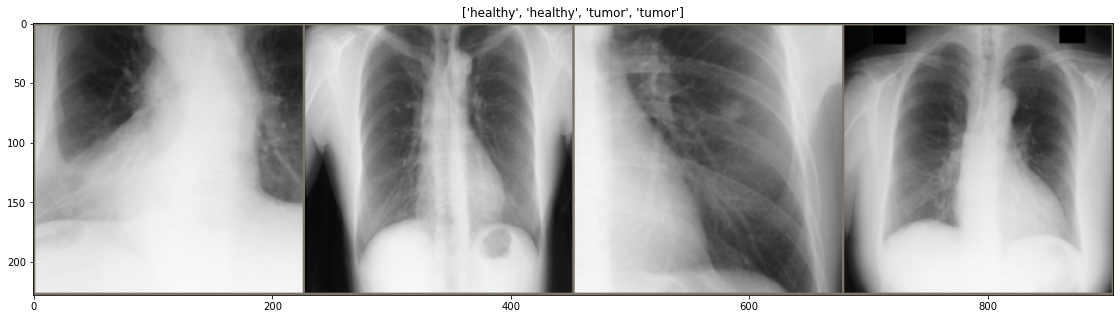

In [48]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
plt.figure(figsize=(20,5))
imshow(out, title=[class_names[x] for x in classes])

## Code for model training

In [49]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

## Visualiztion of model predictions

In [50]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0

    with torch.no_grad():

        for i, (inputs, labels) in enumerate(dataloaders['test']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'true diagnosis: {class_names[labels[j]]} \n predicted: {class_names[preds[j]]}')
                plt.figure(figsize=(5,5))
                imshow(inputs.cpu().data[j])
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [51]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [52]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.7202 Acc: 0.5700
val Loss: 0.7307 Acc: 0.4571

Epoch 1/24
----------
train Loss: 0.6852 Acc: 0.6050
val Loss: 0.6770 Acc: 0.5143

Epoch 2/24
----------
train Loss: 0.7426 Acc: 0.5850
val Loss: 0.9702 Acc: 0.5143

Epoch 3/24
----------
train Loss: 0.7870 Acc: 0.6100
val Loss: 1.4971 Acc: 0.5143

Epoch 4/24
----------
train Loss: 0.6832 Acc: 0.6300
val Loss: 0.6732 Acc: 0.5429

Epoch 5/24
----------
train Loss: 0.8609 Acc: 0.6200
val Loss: 0.8848 Acc: 0.5429

Epoch 6/24
----------
train Loss: 0.8476 Acc: 0.6450
val Loss: 1.8822 Acc: 0.4571

Epoch 7/24
----------
train Loss: 0.7976 Acc: 0.6550
val Loss: 0.9348 Acc: 0.5714

Epoch 8/24
----------
train Loss: 0.5948 Acc: 0.7000
val Loss: 1.0740 Acc: 0.6000

Epoch 9/24
----------
train Loss: 0.5673 Acc: 0.7200
val Loss: 0.9422 Acc: 0.6000

Epoch 10/24
----------
train Loss: 0.6190 Acc: 0.6750
val Loss: 0.7955 Acc: 0.6286

Epoch 11/24
----------
train Loss: 0.5889 Acc: 0.6950
val Loss: 0.9051 Acc: 0.6000

Ep

Accuracy of our model wa 0.65 on validation set.

## Results, AUC ROC and Accuracy on test set

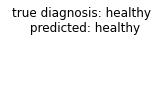

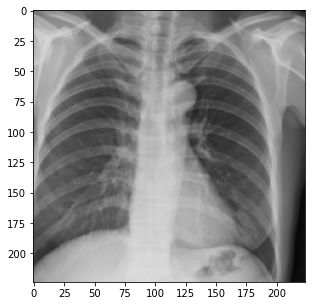

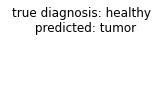

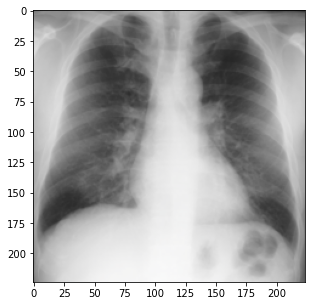

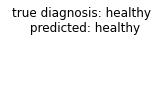

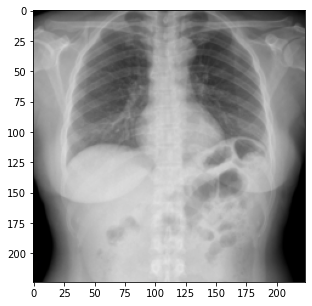

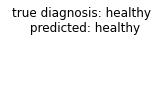

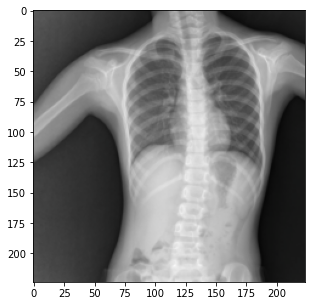

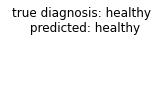

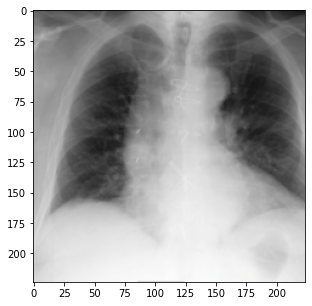

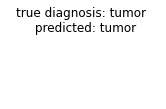

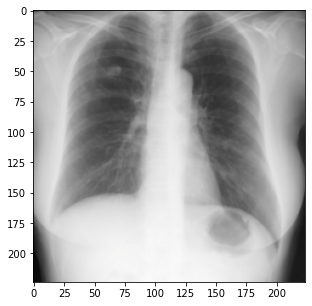

In [53]:
visualize_model(model_ft)

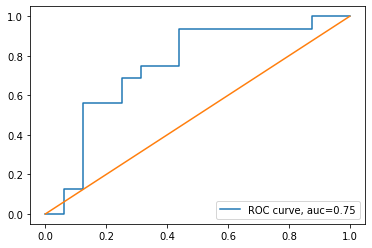

Accuracy on test:  0.75


In [54]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
y_true = []
y_probas = []
y_preds = []
for i, (inputs, labels) in enumerate(dataloaders['test']):
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model_ft(inputs)
    _, preds = torch.max(outputs, 1)
    probas = torch.sigmoid(outputs)[:,1]
    for j in range(inputs.size()[0]):
        y_true.append(labels[j].item())
        y_probas.append(probas[j].item())
        y_preds.append(preds[j].item())
yt = np.array(y_true)
yp = np.array(y_probas)
ypp =  np.array(y_preds)
fpr, tpr, _ = metrics.roc_curve(yt, yp)
auc = metrics.roc_auc_score(yt, yp)
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc))
plt.plot([0,1],[0,1])
plt.legend(loc=4)
plt.show()
print('Accuracy on test: ',accuracy_score(yt,ypp))

Confusion Matrix

Text(33.0, 0.5, 'Truth')

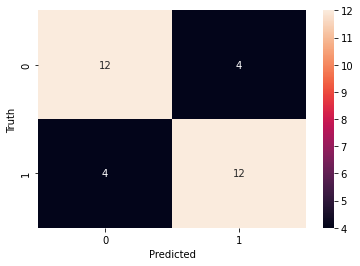

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(yt,ypp)
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Taking into account that we are dealing with medical data, we consider our results in predicting the tumor in patient's lungs tp be good.